> 문제 3번 수정 알려주기

갓 입사한 신입사원 김모씨는 기획 부서에 배치되었다. 첫 프로젝트로 신규 스마트폰 스팩 기획 업무를 보조하게 되었다. 장고 끝에 김씨는 온라인 디지털 마켓 사이트 "디판다요"에서 판매중인 스마트폰 데이터를 수집하여 이를 분석하고 향후 프로젝트의 백데이터로 활용하기로 결심하였다.

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Q1. 스마트폰의 경우 많은 제품이 출시되지만 정작 주목받는 제품은 극히 적다고 한다. 판매 지수(sales)를 기준으로 이상치라고 판단되는 제품을 주목받는 제품이라고 판단하고 해당 제품들의 성능지표를 산출하시오. 산출된 성능지표의 평균은 얼마인가?

<성능지표 계산식>
$$성능지표 = \frac{ROM}{32} + \frac{RAM}{2} + 카메라 개수 + \frac{배터리 용량}{1000}$$

※ 카메라 개수  : num_rear_camera + num_front_camera  
※ 이상치는 평균으로 부터 2 표준편차보다 큰 값으로 정의한다.  
※ 결과는 반올림하여 소수점 둘째 자리까지 계산하시오.  
(정답 예시: 0.12) 

---

판매 지수(sales)를 기준으로 이상치  
※ 이상치는 평균으로 부터 2 표준편차보다 큰 값으로 정의한다.  

In [104]:
import pandas as pd
df = pd.read_csv("../Datasets/mobiles.csv")
df.head(2)

screen_size  ROM  RAM  num_rear_camera  num_front_camera  battery_capacity  \
0  Very Small   64    2                1                 1              1800   
1       Small   64    4                2                 1              2815   

   ratings  num_of_ratings  sales_price  discount_percent   sales  
0      4.5           38645        32999              0.17  127.52  
1      4.5             244        57149              0.04    1.39

In [41]:
df1=df[["ROM", "RAM", "num_rear_camera", "num_front_camera", "battery_capacity", "sales"]].copy()

Q. sales 어떻게 생겼길래 아웃라이어 처리하라는 거지?

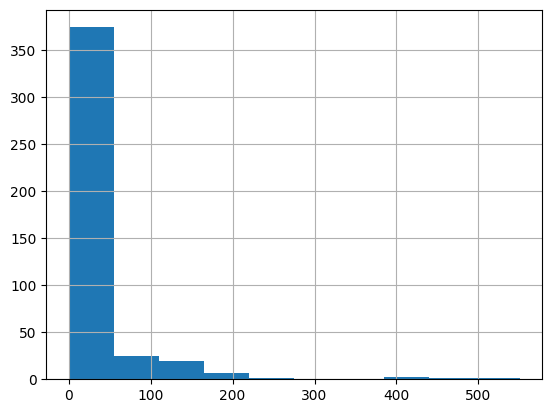

In [14]:
df1['sales'].hist();

In [42]:
stat_outlier = df1['sales'].mean() + df1['sales'].std() * 2
stat_outlier

146.55150129273218

이상치라고 판단되는 제품을 주목받는 제품이라고 판단하고 해당 제품들의 성능지표

In [43]:
df1=df1.loc[df1['sales']>stat_outlier]

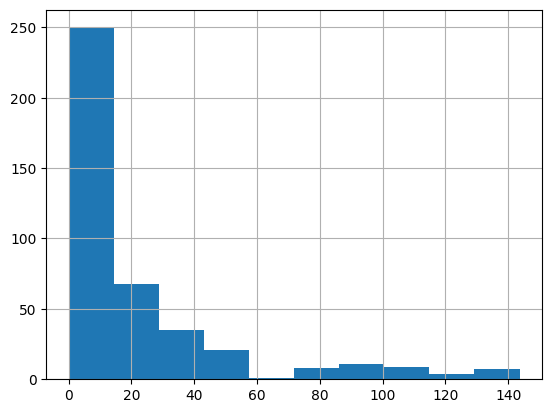

In [29]:
df1['sales'].hist();

성능지표  
<성능지표 계산식>
$$성능지표 = \frac{ROM}{32} + \frac{RAM}{2} + 카메라 개수 + \frac{배터리 용량}{1000}$$
 
※ 카메라 개수  : num_rear_camera + num_front_camera  


In [44]:
len(df1)

16

In [45]:
idx = (df1["ROM"] / 32) + (df1["RAM"] / 2) \
                    + df1["num_front_camera"] + df1["num_rear_camera"] \
                    + (df1["battery_capacity"] / 1000)

※ 결과는 반올림하여 소수점 둘째 자리까지 계산하시오.  

In [46]:
round(idx.mean(), 2)

11.01

### Q2. 판매 지수와 가장 상관관계가 높은 변수를 찾고자 한다. 배터리 용량, 평가 점수 평균, 평가 개수, 판매 가격, 할인율 변수와 판매 지수를 피어슨 상관분석을 실시하였을 때 상관계수의 절대값이 가장 큰 변수의 상관계수는 얼마인가?
※ 후면 카메라가 1개인 제품은 제외하시오.  
※ 통계적 유의성은 고려하지 않음  
※ 결과는 반올림하여 소수점 둘째 자리까지 출력하시오.  
(정답 예시: 0.12)

※ 후면 카메라가 1개인 제품은 제외하시오.  

In [47]:
df.columns

Index(['screen_size', 'ROM', 'RAM', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

판매 지수와 가장 상관관계가 높은 변수
배터리 용량, 평가 점수 평균, 평가 개수, 판매 가격, 할인율 변수와 판매 지수

절대값 가장 큰 거

※ 결과는 반올림하여 소수점 둘째 자리까지 출력하시오.  

In [50]:
df2=df.loc[df.num_rear_camera != 1, 'battery_capacity':]

In [78]:
df2.corr()['sales'][:-1].abs().max()

0.9491139794930513

In [77]:
round(df2.corr()['sales'][:-1].abs().max())

1

In [79]:
df2.corrwith(df2['sales'])[:-1].abs().max()

0.949113979493051

In [80]:
round(df2.corrwith(df2['sales'])[:-1].abs().max(),2)

0.95

### Q3. 판매지수를 예측하기 위해 머신러닝 모델을 활용하고자 한다. k-NN 알고리즘을 사용하고 연산에 사용하는 이웃의 개수를 변화하면서 가장 성능이 좋은 모델을 확보하려 한다. RMSE(Root Mean Squared Error)를 기준으로 가장 성능이 좋은 모델~~을 확인하고 해당 모델의 RMSE를 출력하시오.~~ 의 군집개수 k를 구하라

<독립 변수>
- 판매 지수를 제외한 모든 변수

<종속변수>
 - 판매 지수

※ 명목형 독립변수의 경우 One Hot Encoding을 실시한 결과를 모델에 사용하시오.  
※ 학습에 사용하는 독립변수의 개수는 총 14개 이다.  
※ 학습 및 평가 데이터 세트 분할비는 8:2으로 하시오.  
※ 정규화는 Min-Max 정규화를 실시하며 평가 데이터 세트는 학습 데이터 세트 기반으로 정규화 하시오.  
※ seed는 123으로 고정하시오.  
※ 최근접 이웃은 3, 5, 7, 9, 11개를 사용하시오.  
※ 정답은 반올림하여 소수점 둘째 자리까지 출력하시오.  
(정답 예시: ~~1.23~~ 9)

In [1]:
import pandas as pd
df = pd.read_csv('../Datasets/mobiles.csv')

※ seed는 123으로 고정하시오.  

In [9]:
seed = 123

※ 학습 및 평가 데이터 세트 분할비는 8:2으로 하시오.  

In [10]:
y=df[['sales']]
X=df.drop(columns='sales').copy()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

※ 명목형 독립변수의 경우 One Hot Encoding을 실시한 결과를 모델에 사용하시오.  

In [12]:
col_cate = X_train.select_dtypes(exclude='number').columns
col_num = X_train.select_dtypes(include='number').columns

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
ohe=OneHotEncoder(handle_unknown='ignore', sparse_output=True)

> 지금은 테스트셋이 하나의 데이터셋에서 나눴는데 만약 테스트셋을 따로 제공했을 때 테스트셋의 범주형 컬럼개수가 더 많다면 판다스 겟더미함수는 오류발생, 어려운 문제를 낸다면 풀기위해서 꼭 알아야 하는 문법

In [15]:
X_train_cate=ohe.fit_transform(X_train[col_cate])
X_test_cate=ohe.transform(X_test[col_cate])

In [16]:
X_train_cate

<344x5 sparse matrix of type '<class 'numpy.float64'>'
	with 344 stored elements in Compressed Sparse Row format>

> 희소행렬(0이 너무 많은 행렬)을 dense(우리가 알고 있는 테이블형태)하게 저장할 필요없이 메모리 효율적으로 숫자가 있는 위치만 저장함)

※ 정규화는 Min-Max 정규화를 실시하며 평가 데이터 세트는 학습 데이터 세트 기반으로 정규화 하시오.  

In [17]:
minmax_scaler=MinMaxScaler()

In [32]:
X_train_num = minmax_scaler.fit_transform(pd.concat([X_train[col_num], y_train], axis=1))
y_train_minmax=X_train_num[:,-1]
X_train_num=X_train_num[:,:-1]

In [36]:
X_test_num = minmax_scaler.transform(pd.concat([X_test[col_num], y_test], axis=1))
y_test_minmax=X_test_num[:,-1]
X_test_num=X_test_num[:,:-1]

※ 학습에 사용하는 독립변수의 개수는 총 14개 이다.  

In [37]:
num_depend = X_train_cate.shape[1]+X_train_num.shape[1]

In [38]:
assert num_depend == 14

In [39]:
from scipy import sparse

In [40]:
X_train_all=sparse.hstack([X_train_cate,X_train_num])

In [41]:
X_test_all=sparse.hstack([X_test_cate,X_test_num])

※ 최근접 이웃은 3, 5, 7, 9, 11개를 사용하시오.  

RMSE(Root Mean Squared Error)를 기준  
※ 정답은 반올림하여 소수점 둘째 자리까지 출력하시오.

In [44]:
k_values = [3,5,7,9,11]

- 3으로 일단 테스트 보여드릴게요

In [45]:
model_knnr=KNeighborsRegressor(n_neighbors=k_values[0])

In [46]:
model_knnr.fit(X_train_all,y_train_minmax)

KNeighborsRegressor(n_neighbors=3)

In [47]:
y_pred=model_knnr.predict(X_test_all)

In [48]:
round(mean_squared_error(y_test_minmax, y_pred)**(1/2),2)

0.08

- 반복문 잠깐

In [49]:
for k in k_values:
    print(k)

3
5
7
9
11


In [50]:
for k in k_values:
    model_knnr=KNeighborsRegressor(n_neighbors=k)
    print(model_knnr.n_neighbors)

3
5
7
9
11


In [51]:
scores = {}

In [52]:
scores = {}
for k in k_values:
    model_knnr=KNeighborsRegressor(n_neighbors=k)
    model_knnr.fit(X_train_all,y_train_minmax)
    y_pred=model_knnr.predict(X_test_all)
    scores[k]=round(mean_squared_error(y_test_minmax, y_pred)**(1/2),2)
scores

{3: 0.08, 5: 0.1, 7: 0.11, 9: 0.11, 11: 0.11}

In [53]:
sorted(scores.items(),  key=lambda x:x[1])[0]

(3, 0.08)

In [54]:
pd.DataFrame(index=scores.keys(), data=scores.values(), columns=['RMSE']).sort_values(by='RMSE')

RMSE
3   0.08
5   0.10
7   0.11
9   0.11
11  0.11

---

k값을 구한다고 하면 문제 빨리 풀기

In [55]:
df_dum=pd.get_dummies(df)

In [56]:
y=df_dum[['sales']]
X=df_dum.drop(columns='sales').copy()

In [57]:
scores = {}
for k in k_values:
    model_knnr=KNeighborsRegressor(n_neighbors=k)
    model_knnr.fit(X,y)
    y_pred=model_knnr.predict(X)
    scores[k]=mean_squared_error(y, y_pred)
scores

{3: 104.86329534883724,
 5: 215.63105646511625,
 7: 353.60899590412913,
 9: 468.67858230261265,
 11: 562.001371330002}

In [58]:
sorted(scores.items(),  key=lambda x:x[1])[0]

(3, 104.86329534883724)